## 20240530 筆記
## 作業
## 請使用 YOLO 根據 kaggle 上面的 traffic sign detection 資料集，建立一個自己的 model。

## https://www.kaggle.com/datasets/pkdarabi/cardetection

## 從 image 裡面取得 foreground object

In [1]:
import cv2
import numpy as np

# 加載圖像
image = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\20210811_18_00_32_415679.jpg')
mask = np.zeros(image.shape[:2], np.uint8)

# 定義模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 繪製矩形，包含前景對象
rect = (50, 50, 450, 290)

# 應用GrabCut算法
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 生成前景掩碼
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image * mask2[:, :, np.newaxis]

# 顯示結果
cv2.imshow('Foreground Object', foreground)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
import plotly.express as px

In [3]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [4]:
image = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\20210811_18_00_32_415679.jpg')
px.imshow(image[:,:,::-1])

In [7]:
# 建立 mask
mask = np.zeros(image.shape[:2], np.uint8)

# 定義模型
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# 繪製矩形，包含前景對象
rect = (305, 0, 646, 625)

# 應用GrabCut算法
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)

# 生成前景掩碼
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
foreground = image * mask2[:, :, np.newaxis]

In [8]:
px.imshow(foreground[:,:,::-1])

In [9]:
import gradio as gr

def process(image, xmin, ymin, xmax, ymax):
    # 建立 mask
    mask = np.zeros(image.shape[:2], np.uint8)
    
    # 定義模型
    bgdModel = np.zeros((1, 65), np.float64)
    fgdModel = np.zeros((1, 65), np.float64)
    
    # 繪製矩形，包含前景對象
    rect = (xmin, ymin, xmax, ymax)
    
    # 應用GrabCut算法
    cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
    
    # 生成前景掩碼
    mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
    foreground = image * mask2[:, :, np.newaxis]
    return foreground

In [10]:
gr.Interface(process,
             ["image", "number", "number", "number", "number"],
             "image").launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


## 使用 YOLOv8 的 Instance Segmentation

In [3]:
from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n-seg.yaml")  # build a new model from YAML
model = YOLO("yolov8n-seg.pt")  # load a pretrained model (recommended for training)
# model = YOLO("yolov8n-seg.yaml").load("yolov8n.pt")  # build from YAML and transfer weights

# Train the model
# results = model.train(data="coco8-seg.yaml", epochs=100, imgsz=640)

In [4]:
results = model(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\60c57665-0fa8-4f61-9c2b-73c34f57416d.jpg')


image 1/1 C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\60c57665-0fa8-4f61-9c2b-73c34f57416d.jpg: 480x640 1 person, 110.7ms
Speed: 3.0ms preprocess, 110.7ms inference, 1277.7ms postprocess per image at shape (1, 3, 480, 640)


In [7]:
results[0].show()

## Instance Segmentation 只畫出 polygon 的形狀。

In [15]:
image = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\60c57665-0fa8-4f61-9c2b-73c34f57416d.jpg')
# image = image[:,:,::-1]

In [16]:
results = model(image[:,:,::-1])


0: 480x640 1 person, 102.7ms
Speed: 6.0ms preprocess, 102.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


In [17]:
results[0].show()


0: 480x640 1 person, 119.7ms
Speed: 4.0ms preprocess, 119.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


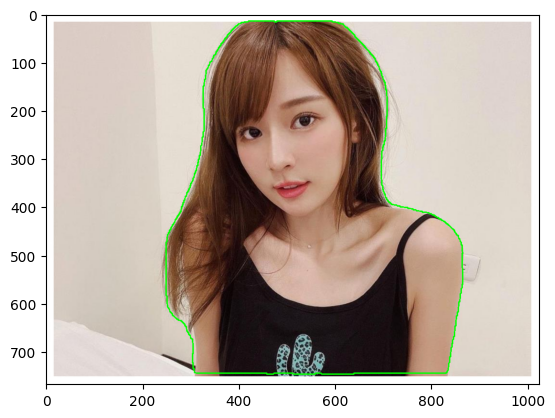

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

image = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\60c57665-0fa8-4f61-9c2b-73c34f57416d.jpg')
# image = image[:,:,::-1]
results = model(image)
# image = image.astype(np.int32)
for result in results:
    for seg in result.masks.xy:  # 獲取分割多邊形
        # 轉換為整數類型座標
        points = np.array(seg, dtype=np.int32)
        # 繪製多邊形
        cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image[:,:,::-1])
# print(image)

In [12]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.9112])
data: tensor([[244.8211,   6.6599, 867.8467, 747.7969,   0.9112,   0.0000]])
id: None
is_track: False
orig_shape: (768, 1024)
shape: torch.Size([1, 6])
xywh: tensor([[556.3339, 377.2284, 623.0256, 741.1370]])
xywhn: tensor([[0.5433, 0.4912, 0.6084, 0.9650]])
xyxy: tensor([[244.8211,   6.6599, 867.8467, 747.7969]])
xyxyn: tensor([[0.2391, 0.0087, 0.8475, 0.9737]])


0: 480x640 1 person, 94.7ms
Speed: 2.0ms preprocess, 94.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


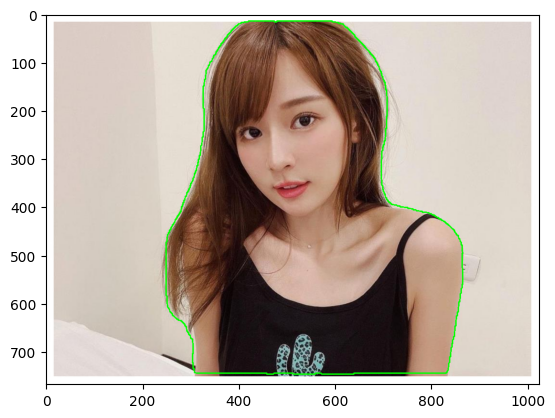

In [14]:
image = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\60c57665-0fa8-4f61-9c2b-73c34f57416d.jpg')
results = model(image)
# image = image.astype(np.int32)
seg = results[0].masks.xy[0]  # 獲取分割多邊形
# 轉換為整數類型座標
points = np.array(seg, dtype=np.int32)
# 繪製多邊形
cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image[:,:,::-1])


0: 480x640 1 person, 107.7ms
Speed: 3.0ms preprocess, 107.7ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)


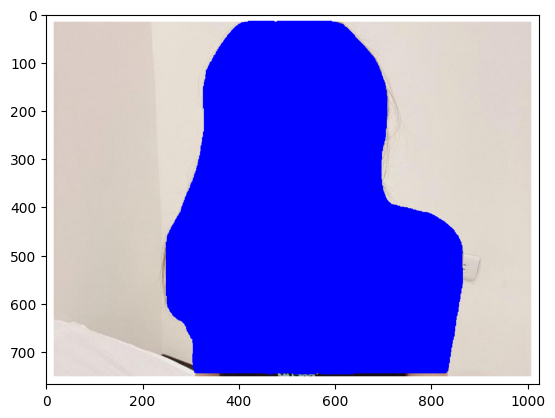

In [46]:
image = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\60c57665-0fa8-4f61-9c2b-73c34f57416d.jpg')
results = model(image)
seg = results[0].masks.xy[0]  # 獲取分割多邊形
# 轉換為整數類型座標
points = np.array(seg, dtype=np.int32)
# 繪製多邊形
# cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
cv2.fillPoly(image, pts=[points], color=(255, 0, 0))
plt.imshow(image[:,:,::-1])

## Instance Segmentation 只畫出特定的物件

In [34]:
results = model(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\Beatles.jpg')
results[0].show()


image 1/1 C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\Beatles.jpg: 640x640 5 persons, 4 cars, 2 trucks, 1 handbag, 135.6ms
Speed: 4.0ms preprocess, 135.6ms inference, 16.0ms postprocess per image at shape (1, 3, 640, 640)


In [35]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0.,  0.,  0.,  2.,  7.,  7.,  0.,  2.,  2.,  2., 26.])
conf: tensor([0.9194, 0.9113, 0.8907, 0.8907, 0.6910, 0.6642, 0.6170, 0.5369, 0.4811, 0.4477, 0.4286, 0.2727])
data: tensor([[9.1861e+01, 1.6200e+02, 1.4799e+02, 2.7351e+02, 9.1938e-01, 0.0000e+00],
        [1.5073e+02, 1.6617e+02, 2.1776e+02, 2.7777e+02, 9.1133e-01, 0.0000e+00],
        [1.9055e+01, 1.6022e+02, 8.3967e+01, 2.7673e+02, 8.9071e-01, 0.0000e+00],
        [2.1703e+02, 1.6216e+02, 2.8653e+02, 2.8166e+02, 8.9066e-01, 0.0000e+00],
        [1.2398e+02, 1.5128e+02, 1.3826e+02, 1.6403e+02, 6.9098e-01, 2.0000e+00],
        [5.6052e+01, 1.5581e+02, 1.0085e+02, 1.9327e+02, 6.6420e-01, 7.0000e+00],
        [2.0146e+02, 1.4903e+02, 2.2800e+02, 1.7434e+02, 6.1699e-01, 7.0000e+00],
        [2.3859e+02, 1.5004e+02, 2.4584e+02, 1.7395e+02, 5.3692e-01, 0.0000e+00],
        [1.8545e+02, 1.5107e+02, 1.9922e+02, 1.6189e+02, 4.8109e-01, 2.0000e+00],
        [1.49

In [36]:
results[0].boxes.cls

tensor([ 0.,  0.,  0.,  0.,  2.,  7.,  7.,  0.,  2.,  2.,  2., 26.])

In [38]:
import pandas as pd

dataframe = results[0]
df = pd.DataFrame(dataframe.boxes.data)
df.columns = ['xmin', 'ymin', 'xmax', 'ymax', 'conf', 'cls']
df

,xmin,ymin,xmax,ymax,conf,cls
0,91.861488,161.996445,147.986450,273.513367,0.919384,0.0
1,150.732620,166.169510,217.762161,277.767731,0.911334,0.0
2,19.055429,160.215363,83.966949,276.730011,0.890711,0.0
3,217.032623,162.156342,286.529144,281.657410,0.890656,0.0
4,123.976036,151.284866,138.255661,164.027466,0.690977,2.0
5,56.052143,155.810852,100.851997,193.269669,0.664203,7.0
6,201.457245,149.031830,227.997147,174.341400,0.616986,7.0
7,238.594101,150.040573,245.838531,173.945862,0.536919,0.0
8,185.451523,151.074509,199.221039,161.887466,0.481086,2.0
9,149.779724,147.602234,157.240646,153.295334,0.447734,2.0


In [40]:
names = [dataframe.names[int(i)] for i in df.cls]
df['names'] = names
df

,xmin,ymin,xmax,ymax,conf,cls,names
0,91.861488,161.996445,147.986450,273.513367,0.919384,0.0,person
1,150.732620,166.169510,217.762161,277.767731,0.911334,0.0,person
2,19.055429,160.215363,83.966949,276.730011,0.890711,0.0,person
3,217.032623,162.156342,286.529144,281.657410,0.890656,0.0,person
4,123.976036,151.284866,138.255661,164.027466,0.690977,2.0,car
5,56.052143,155.810852,100.851997,193.269669,0.664203,7.0,truck
6,201.457245,149.031830,227.997147,174.341400,0.616986,7.0,truck
7,238.594101,150.040573,245.838531,173.945862,0.536919,0.0,person
8,185.451523,151.074509,199.221039,161.887466,0.481086,2.0,car
9,149.779724,147.602234,157.240646,153.295334,0.447734,2.0,car



0: 640x640 5 persons, 4 cars, 2 trucks, 1 handbag, 136.6ms
Speed: 4.0ms preprocess, 136.6ms inference, 17.0ms postprocess per image at shape (1, 3, 640, 640)


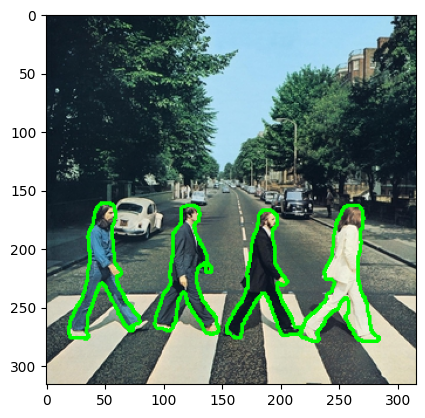

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

image_1 = cv2.imread(r'C:\Users\wangm15\OneDrive - Corning Incorporated\Desktop\img\Beatles.jpg')
# image = image[:,:,::-1]
results = model(image_1)
# image = image.astype(np.int32)
for i, seg in enumerate(results[0].masks.xy):  # 獲取分割多邊形
    if int(results[0].boxes.cls[i])==0:
        if float(results[0].boxes.conf[i])>0.6:
            # 轉換為整數類型座標
            points = np.array(seg, dtype=np.int32)
            # 繪製多邊形
            cv2.polylines(image_1, [points], isClosed=True, color=(0, 255, 0), thickness=2)
plt.imshow(image_1[:,:,::-1])

In [52]:
import gradio as gr

def process(image, cls='0', conf='0.6'):
    results = model(image)
    for i, seg in enumerate(results[0].masks.xy):  # 獲取分割多邊形
        if int(results[0].boxes.cls[i])==int(cls):
            if float(results[0].boxes.conf[i])>float(conf):
                # 轉換為整數類型座標
                points = np.array(seg, dtype=np.int32)
                # 繪製多邊形
                cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    return image

In [53]:
gr.Interface(process, ["image", "text", "text"], "image").launch()

Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.



0: 640x640 5 persons, 5 cars, 1 truck, 134.6ms
Speed: 4.0ms preprocess, 134.6ms inference, 14.0ms postprocess per image at shape (1, 3, 640, 640)


## 怎麼做 Transfer Learning？
## 使用別人做好的 Feature Extraction 的部分 + 自己做的 Classification 的部分。

## 使用Transfer Learning做MNIST分類

In [54]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 加载MNIST数据集 #數字辨識
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 将图像转换为3通道（RGB）以匹配预训练模型的输入
x_train = tf.image.grayscale_to_rgb(tf.expand_dims(x_train, axis=-1))
x_test = tf.image.grayscale_to_rgb(tf.expand_dims(x_test, axis=-1))

x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# 归一化图像
x_train = x_train / 255
x_test = x_test / 255

# 将标签转换为one-hot编码
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 6s 1us/step


In [55]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# 加载预训练的MobileNetV2模型，不包含顶层
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 冻结预训练模型的层
for layer in base_model.layers:
    layer.trainable = False

# 添加自定义分类层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# 创建最终的模型
model = Model(inputs=base_model.input, outputs=predictions)



9406464/9406464 [==============================] - 3s 0us/step


In [56]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 使用数据增强
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(x_train)

# 训练模型
model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


1875/1875 [==============================] - 53s 27ms/step - loss: 1.1814 - accuracy: 0.5874 - val_loss: 0.9369 - val_accuracy: 0.6791
Epoch 2/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.0543 - accuracy: 0.6294 - val_loss: 0.8913 - val_accuracy: 0.6885
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 1.0220 - accuracy: 0.6396 - val_loss: 0.9061 - val_accuracy: 0.6833
Epoch 4/10
1875/1875 [==============================] - 51s 27ms/step - loss: 1.0008 - accuracy: 0.6476 - val_loss: 0.8585 - val_accuracy: 0.6959
Epoch 5/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.9821 - accuracy: 0.6539 - val_loss: 0.8755 - val_accuracy: 0.6952
Epoch 6/10
1875/1875 [==============================] - 52s 27ms/step - loss: 0.9781 - accuracy: 0.6562 - val_loss: 0.8589 - val_accuracy: 0.6982
Epoch 7/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.9593 - accuracy: 0.6615 - val_loss: 0.849

## 使用NN 做MNIST分類

Epoch 1/10
480/480 [==============================] - 3s 5ms/step - loss: 0.4172 - accuracy: 0.8826 - val_loss: 0.2680 - val_accuracy: 0.9226
Epoch 2/10
480/480 [==============================] - 2s 4ms/step - loss: 0.2675 - accuracy: 0.9205 - val_loss: 0.2213 - val_accuracy: 0.9367
Epoch 3/10
480/480 [==============================] - 2s 4ms/step - loss: 0.2385 - accuracy: 0.9289 - val_loss: 0.2356 - val_accuracy: 0.9278
Epoch 4/10
480/480 [==============================] - 2s 4ms/step - loss: 0.2391 - accuracy: 0.9260 - val_loss: 0.2365 - val_accuracy: 0.9268
Epoch 5/10
480/480 [==============================] - 2s 4ms/step - loss: 0.2274 - accuracy: 0.9307 - val_loss: 0.2227 - val_accuracy: 0.9347
Epoch 6/10
480/480 [==============================] - 2s 4ms/step - loss: 0.2077 - accuracy: 0.9349 - val_loss: 0.2091 - val_accuracy: 0.9349
Epoch 7/10
480/480 [==============================] - 2s 4ms/step - loss: 0.1975 - accuracy: 0.9386 - val_loss: 0.1862 - val_accuracy: 0.9449
Epoch 

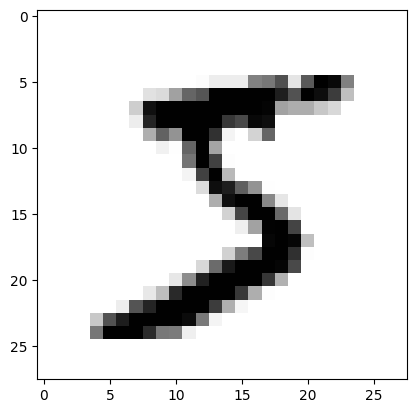

In [57]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap='gray_r')
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()

model.add(Dense(500, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(500))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)
# train_history = model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)

## 使用 CNN 做 MNIST 的分類

In [58]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [59]:
x_train.shape

(60000, 28, 28)

In [60]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)

Epoch 1/10
480/480 [==============================] - 10s 20ms/step - loss: 0.7677 - accuracy: 0.9206 - val_loss: 0.0724 - val_accuracy: 0.9771
Epoch 2/10
480/480 [==============================] - 10s 20ms/step - loss: 0.0557 - accuracy: 0.9823 - val_loss: 0.0640 - val_accuracy: 0.9808
Epoch 3/10
480/480 [==============================] - 10s 20ms/step - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0531 - val_accuracy: 0.9844
Epoch 4/10
480/480 [==============================] - 9s 20ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0505 - val_accuracy: 0.9858
Epoch 5/10
480/480 [==============================] - 9s 20ms/step - loss: 0.0269 - accuracy: 0.9911 - val_loss: 0.0512 - val_accuracy: 0.9852
Epoch 6/10
480/480 [==============================] - 9s 19ms/step - loss: 0.0209 - accuracy: 0.9930 - val_loss: 0.0526 - val_accuracy: 0.9862
Epoch 7/10
480/480 [==============================] - 9s 20ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0683 - val_accuracy: 0.9

In [62]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.optimizers import Adam, SGD
from keras.models import Sequential

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=100, validation_split=0.2, epochs=10)

Epoch 1/10
480/480 [==============================] - 10s 19ms/step - loss: 0.5775 - accuracy: 0.8951 - val_loss: 0.0815 - val_accuracy: 0.9758
Epoch 2/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0953 - accuracy: 0.9717 - val_loss: 0.0446 - val_accuracy: 0.9869
Epoch 3/10
480/480 [==============================] - 10s 20ms/step - loss: 0.0696 - accuracy: 0.9794 - val_loss: 0.0524 - val_accuracy: 0.9858
Epoch 4/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0382 - val_accuracy: 0.9889
Epoch 5/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0485 - accuracy: 0.9852 - val_loss: 0.0429 - val_accuracy: 0.9889
Epoch 6/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0353 - val_accuracy: 0.9891
Epoch 7/10
480/480 [==============================] - 10s 21ms/step - loss: 0.0364 - accuracy: 0.9895 - val_loss: 0.0453 - val_accuracy:

In [65]:
model.save("mnist_model_1")

INFO:tensorflow:Assets written to: mnist_model_1\assets


INFO:tensorflow:Assets written to: mnist_model_1\assets


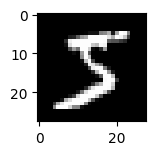

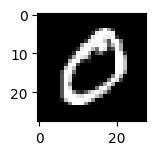

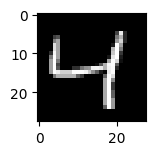

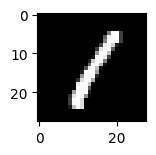

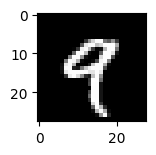

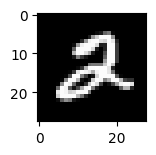

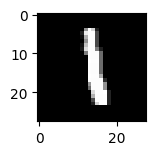

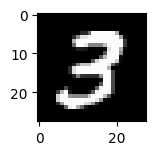

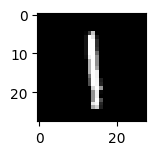

In [78]:
from matplotlib import pyplot
from datetime import datetime
import time

for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()
    time.sleep(0.5)
    cv2.imwrite(r'C:\Users\wangm15\mnist_model_1\number/'+str(datetime.now().strftime("%Y%m%d_%H_%M_%S_%f"))+'.jpg', [int(cv2.IMWRITE_JPEG_QUALITY),100])

313/313 [==============================] - 1s 3ms/step
[          0           0           0           0           0           0           1           0           0           0]  should be  0


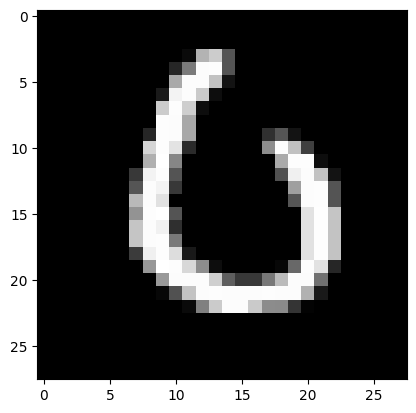

[        0.5           0           0           0           0           0           0           0         0.5           0]  should be  0


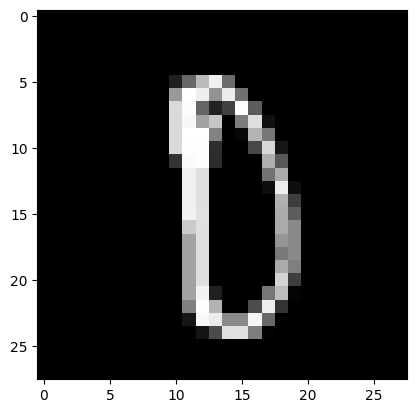

[        0.4           0           0           0           0           0         0.6           0           0           0]  should be  0


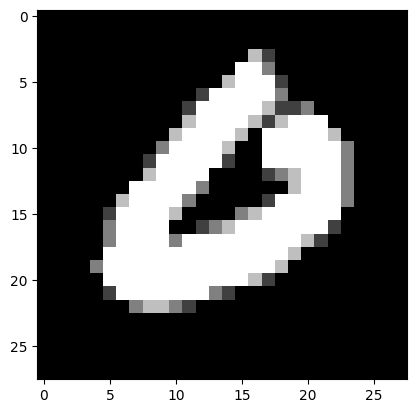

[          0           0           0           0           0           0           1           0           0           0]  should be  0


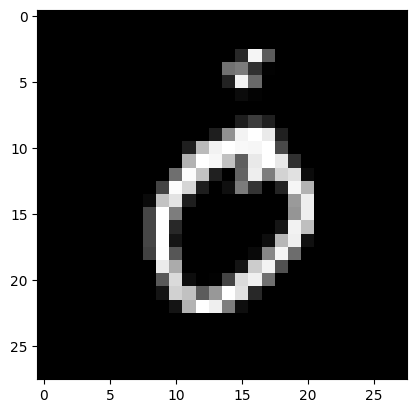

[        0.5           0           0           0           0           0         0.5           0           0           0]  should be  0


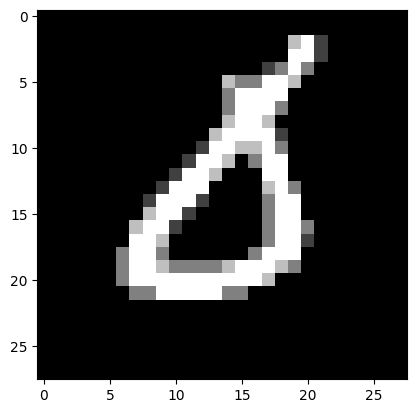

In [82]:
y_predictions = model.predict(x_test)
a,b=[],[]
for i in range(len(y_predictions)):
    a.append(np.argmax(y_predictions[i], axis=0))
    b.append(np.argmax(y_test[i], axis=0))

plt.show()

for i, (aa, bb) in enumerate(zip(a,b)):
    if aa != bb and bb == 0:
        print(y_predictions[i].round(1),' should be ',bb)
        plt.imshow(x_test[i], cmap=pyplot.get_cmap('gray'))
        plt.show()       

## 測試一下我們的模型

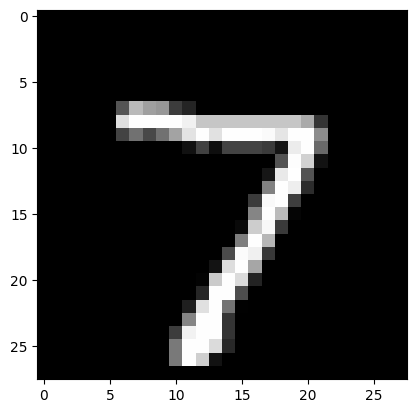

In [83]:
plt.imshow(x_test[0], cmap="gray")

In [84]:
np.argmax(model.predict(x_test[0].reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 22ms/step


7

In [92]:
def predict(image):
    # # return image['layers'][0].size
    # test = image['layers'][0].convert('L').thumbnail((28, 28))
    # test = np.array(test)
    # # return np.argmax(model.predict(test.reshape(1, 28, 28, 1)))
    image['composite'].convert('L').save('test.jpg')
    test = np.array(image['composite'].convert('L').resize((28, 28)))
    return np.argmax(model.predict(test.reshape(1, 28, 28, 1)))

In [94]:
gr.Interface(predict, gr.ImageEditor(type="pil", sources=None, layers=False), 'text').launch()

TypeError: 'NoneType' object is not iterable